In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acovf
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [3]:
rcParams['figure.figsize'] = 15, 6

serie1 = pd.read_csv("coloradoRiver.txt")
serie2 = pd.read_csv("electricity.txt")
serie3 = pd.read_csv("lynx.txt")

series = [serie1, serie2, serie3]
nomes = ['Colorado river', 'Electricity', 'Lynx']

# 1. Faça para as séries:

### a) Plot das séries junto com a média movel;

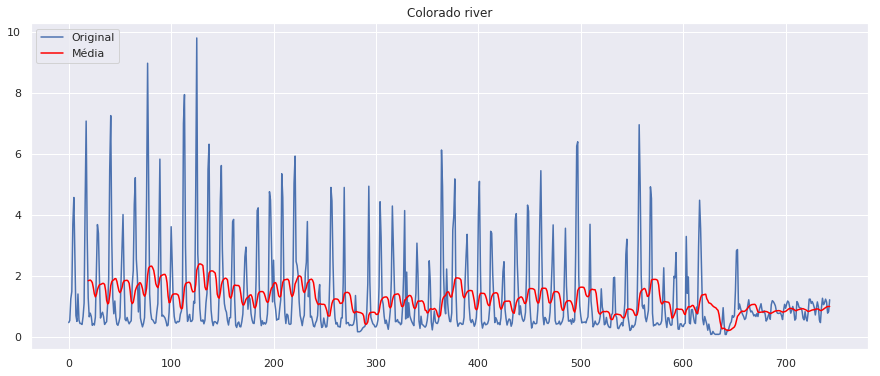

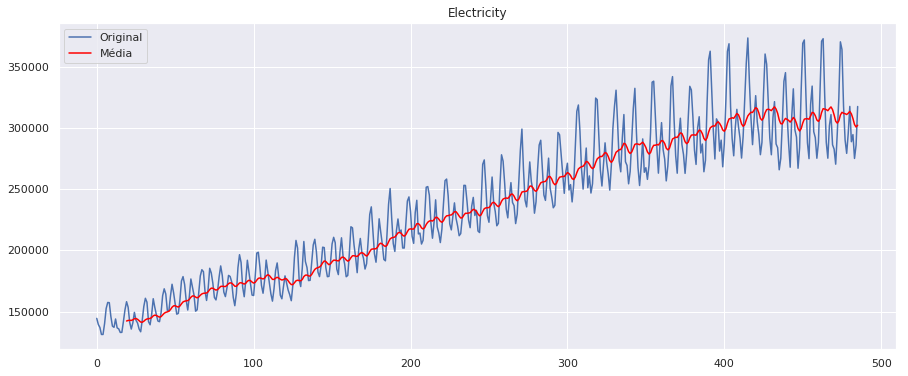

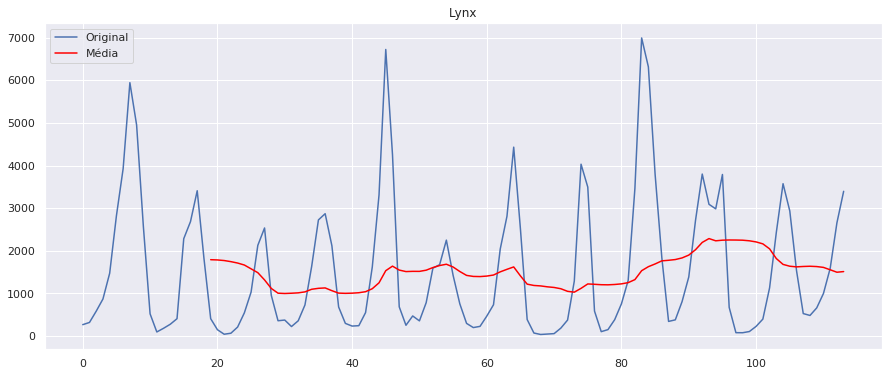

In [4]:
for i, serie in enumerate(series):
    m_m = serie.rolling(window=20).mean()
    orig = plt.plot(serie,label='Original')
    mean = plt.plot(m_m, color='red',label='Média')
    plt.legend(loc='upper left')
    plt.title(nomes[i])
    plt.show()

### b) Cálculo da média;

In [7]:
medias = np.zeros(len(series))
for i, serie in enumerate(series):
    medias[i] = (serie.mean())
    print(nomes[i],':', medias[i])

Colorado river : 1.2375672043010753
Electricity : 236186.17283950618
Lynx : 1538.017543859649


### c) Cálculo da autocovariância;

In [5]:
def autoCovariance(X, h):
    autoCov = 0
    N = len(X)
    for i in np.arange(0, N-h):
        autoCov += ((X[i+h])-X.mean())*(X[i]-X.mean())
    return (1/(N))*autoCov

In [6]:
for s, ser in enumerate(series):
    print(nomes[s],':')
    serie = np.array(ser)
    array = np.zeros(20)
    for i in range(20):
        acv = autoCovariance(serie, i)
        array[i] = acv
    print(array)
    print()

Colorado river :
[ 1.89212083  1.20823368  0.33775834 -0.17871688 -0.3855164  -0.45492157
 -0.48283742 -0.46819253 -0.40015787 -0.23649994  0.21487869  0.92426404
  1.37879952  0.93426499  0.19906323 -0.23943221 -0.43733888 -0.49961123
 -0.51393529 -0.50197312]

Electricity :
[3.61626168e+09 3.43156085e+09 3.13577689e+09 2.95325956e+09
 2.98129671e+09 3.14234240e+09 3.20981602e+09 3.10927462e+09
 2.92651700e+09 2.87230840e+09 3.02604108e+09 3.26958205e+09
 3.38948036e+09 3.21357184e+09 2.92749687e+09 2.75311719e+09
 2.78808716e+09 2.94614172e+09 3.01096993e+09 2.90994694e+09]

Lynx :
[ 2492840.38565713  1771957.50261349   534493.54016081  -469963.73007889
 -1080644.43306712 -1251948.27055828  -998007.62990232  -368902.1279044
   544349.23405042  1248683.68464791  1281088.81576247   706584.6041562
   -72018.25010935  -755447.23903171 -1121494.53774171 -1148653.72103157
  -862665.85676834  -244305.50974119   555983.04873564  1060929.88668308]



### d) Cálculo da autocorrelação;

In [7]:
def autoCorrelation(X, h):
    return autoCovariance(X, h) / autoCovariance(X, 0)

In [8]:
for s, ser in enumerate(series):
    print(nomes[s],':')
    serie = np.array(ser)
    array = np.zeros(20)
    for i in range(20):
        acr = autoCorrelation(serie, i)
        array[i] = acr
    print(array)
    print()

Colorado river :
[ 1.          0.63856053  0.17850781 -0.09445321 -0.2037483  -0.24042945
 -0.25518318 -0.24744325 -0.21148643 -0.12499199  0.11356499  0.48848045
  0.72870585  0.49376603  0.1052064  -0.12654171 -0.23113686 -0.26404827
 -0.27161864 -0.26529655]

Electricity :
[1.         0.94892493 0.86713218 0.81666091 0.82441399 0.86894774
 0.88760613 0.85980355 0.80926583 0.7942756  0.83678709 0.90413315
 0.93728846 0.88864472 0.80953679 0.76131581 0.77098601 0.81469262
 0.83261948 0.80468373]

Lynx :
[ 1.          0.71081868  0.21441146 -0.1885254  -0.43349925 -0.50221758
 -0.40034959 -0.14798466  0.21836506  0.500908    0.51390728  0.28344559
 -0.02889004 -0.30304677 -0.44988622 -0.46078109 -0.3460574  -0.09800287
  0.22303195  0.42559078]



# 2. Através da análise da média e autocorrelação, podemos inferir que a série sem_nome.txt é caracterizada como?

In [9]:
data = pd.read_csv('sem_nome.txt')

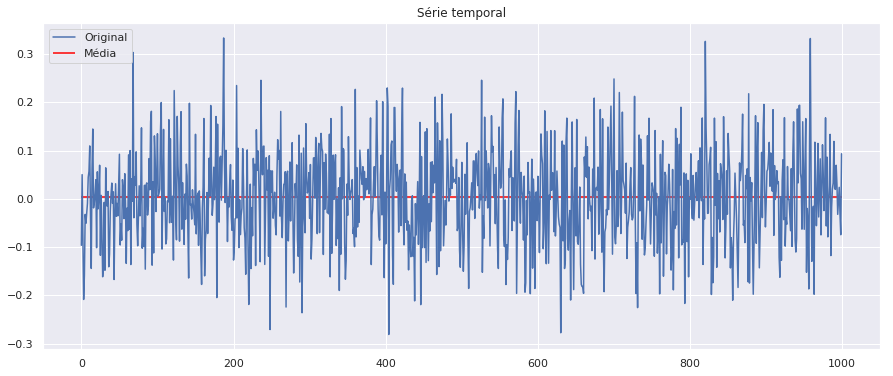

In [10]:
plt.plot(data,label='Original')
plt.hlines(data.mean(), 0, len(data), color='red',label='Média')
plt.legend(loc='upper left')
plt.title('Série temporal')
plt.show()

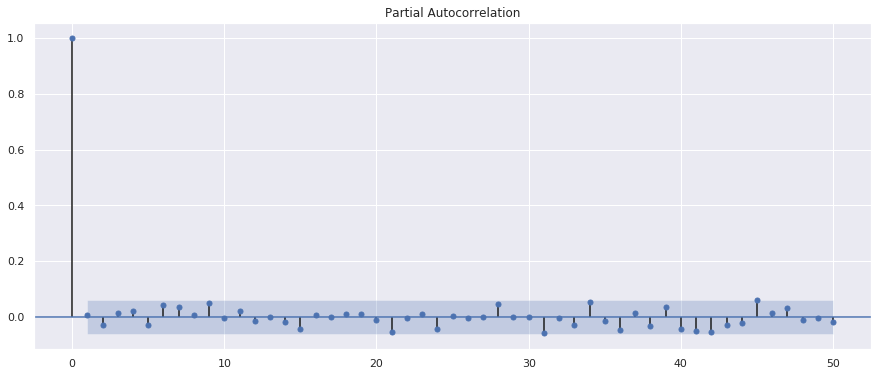

In [11]:
auto = smt.graphics.plot_pacf(data, lags=50, alpha=0.05)

Visualizando o plot da série, nota-se que a média da série é zero e a variância constante, aproximadamente. Analisando o correlograma parcial, também verifica-se que os valores de autocorrelação de todos os lags são menores que a significância (alpha = 0.05). Portanto, conclui-se que a série é caracterizada como um ruído branco.

# 3. Existe o teste estatístico Augmented Dickey-Fuller (ADF), este pode ser utilizado para identificar estacionariedade da série. Neste contexto, faça:

### a) Uma pesquisa e descreva como este teste funciona;

Dickey-Fuller Aumentado é um tipo de teste estatístico chamado de teste de raiz unitária. A intuição por trás do teste é determinar quão forte a série temporal é definida por uma tendência. Existem diversos outros testes de raiz unitária, mas o teste Augmented Dickey-Fuller é considerado um dos mais utilizados.

- A hipótese nula (H0) do teste indica que a série pode ser representada por uma raiz unitária, portanto não é estacionária (possui uma estrutura dependente do tempo). 
- A hipótese alternativa (Ha) indica que a série é estacionária (não possui uma estrutura dependente do tempo).

Interpretamos o resultado usando o p-valor do teste. Se o p-valor for menor que o nível de significância (5% para esta lista), é sugerido que a hipótese nula seja rejeitada, havendo indícios de que a série é estacionária. Caso contrário, se o p-valor for maior que o nível de significância, a hipótese nula não será rejeitada, indicando que a série não é estacionária.

- p-valor > 0.05: Não rejeita-se a hipótese nula (H0), os dados possuem raiz unitária e não é estacionária.
- p-valor <= 0.05: Rejeita-se a hipótese nula (H0), os dados não possuem raiz unitária e é estacionária.


### b) Calcule o ADF test para as séries: 1-coloradoRiver.txt, 2-electricity.txt e 3-lynx.txt;

In [51]:
for i, serie in enumerate(series):
    adf = adfuller(serie.iloc[:, 0].values)
    print(nomes[i])
    print('ADF = %f.' % adf[0] ,'P-value = %f.' % adf[1],'\n')

Colorado river
ADF = -4.928886. P-value = 0.000031. 

Electricity
ADF = -1.431940. P-value = 0.566872. 

Lynx
ADF = -2.996304. P-value = 0.035241. 



# 4. A partir das análises feitas acima, as séries 1-coloradoRiver.txt, 2-electricity.txt e 3-lynx.txt são estacionárias? Exponha quais são as principais evidêncas;

Analisando visualmente as séries e aplicando o teste estatístico Dickey-Fuller Aumentado, conclui-se que:

- A série <i>Colorado River</i> possui média que varia pouco ao longo do tempo, estando entre os valores 1 e 2. Já sua variância varia de forma considerável. Entretanto, o teste estatístico Dickey-Fuller Aumentado para a série retornou um p-valor de 0.000031, abaixo do nível de significância de 5%. Logo, há indícios de que a série seja estacionária.

- A série <i>Electricity</i> claramente possui uma tendência crescente, não conservando sua média e variância ao longo do tempo. O teste Dickey-Fuller Aumentado retornou um p-valor de 0.566872, acima do nível de significância de 5%. Logo, há fortes indícios de que a série não seja estacionária.

- A série <i>Lynx</i> possui média e variância  que não variam tanto ao longo do tempo. O teste Dickey-Fuller Aumentado retornou um p-valor de 0.035241, abaixo do nível de significância. Portanto, há indícios de que a série seja estacionária.

# 5. Preveja a Série AR(1)

In [155]:
def generateAR1(n = 100, sigma = 1.0, phi = 0.4, x0 = 1.0):
    random_normal = [i for i in np.random.normal(scale=sigma, size = n)]
    series = np.zeros(n)
    series[0] = x0 + random_normal[0]
    for i in range(1, n):
        series[i] = random_normal[i] + phi*series[i-1]
    return series

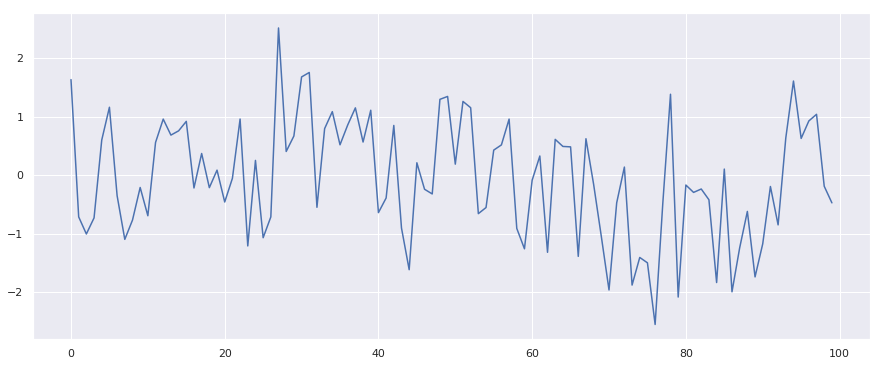

In [168]:
s = generateAR1()
plt.plot(s)

### a) Calcule sua autocovariância e autocorrelação;

In [169]:
serie = np.array(s)
array = np.zeros((2,20))
for i in range(20):
    acv = autoCovariance(serie, i)
    array[0, i] = acv
    acr = autoCorrelation(serie, i)
    array[1, i] = acr
print('Autocovariância:', array[0])
print('Autocorrelação:', array[1])


Autocovariância: [ 1.02692879  0.28925349  0.13887351  0.33879568  0.15078595  0.0396232
  0.09879987  0.06607447  0.01301944  0.05870411  0.04327278  0.04702466
  0.08821584  0.10981545  0.10858221  0.25108588  0.15992706  0.10017538
  0.11964772 -0.00542563]
Autocorrelação: [ 1.          0.2816685   0.13523188  0.32991156  0.14683194  0.03858418
  0.09620908  0.06434182  0.01267803  0.05716473  0.04213805  0.04579155
  0.08590259  0.10693579  0.1057349   0.24450175  0.15573335  0.09754852
  0.11651024 -0.00528336]


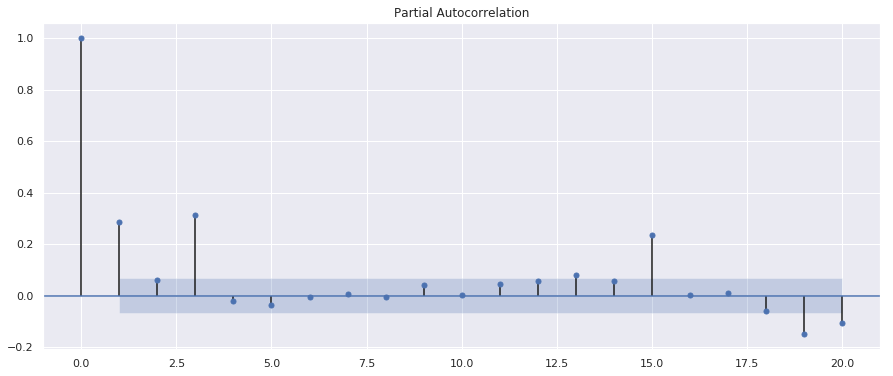

In [175]:
pacr = smt.graphics.plot_pacf(s, lags=20, alpha=0.5)

### b) A partir de p(1), preveja a Série AR(1):